In [1]:
# import os
# os.environ['DATA_READER_VENDOR'] = 'tiingo'
%pylab inline
from requests import post
from app.analysis import Quote
def screen_securities(after=None):
    query = 'query screen($limit:[SecurityLimitOptionInput!]!,$after:String){viewer{screenSecurities(filterTypes:EQUITY,limit:$limit,sort:{type:MARKET_CAP,direction:DESC},first:100,after:$after){pageInfo{hasNextPage,endCursor},edges{node{symbol}}}}}'
    variables = {'limit':[{'type':'MARKET_CAP','min':32000000000,'inclusive':True}],'after':after}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    cursor = r['data']['viewer']['screenSecurities']['pageInfo']['endCursor']
    return [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['screenSecurities']['edges']], cursor
s1, after = screen_securities()
s2, after = screen_securities(after)
symbols = s1 + s2 + screen_securities(after)[0]
print(len(symbols))
quote = Quote(symbols, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
294
from 2019-05-28 to 2019-07-12 - 294


In [2]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0) & (stats['len'] == stats['len'].max())]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

277


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
AGN,28,5.850436,12.264718,0.473778,26.208052,11.932121
MU,28,4.860470,7.001686,0.688518,35.124469,7.183739
TSLA,28,4.463377,4.538331,0.974740,29.878116,5.735805
SQ,28,4.046706,4.921496,0.814188,25.007595,7.900335
NEM,28,3.460410,3.030960,1.128595,24.980336,2.102607
PSX,28,3.342738,2.187023,1.510298,21.582654,3.084984
AMD,28,3.247746,7.517152,0.426766,14.320138,13.150764
BX,28,3.126745,3.860458,0.799662,15.396187,5.090277
JD,28,3.051120,3.223477,0.934220,18.219851,3.142856


{'AGN': 0.051, 'BBD': 0.179, 'EPD': 0.117, 'HD': 0.151, 'NEE': 0.096, 'RIO': 0.195, 'TJX': 0.212} 1.779


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,28.0,1.742610,0.301052,1.063631,1.586811,1.764694,1.887264,2.527525,5.656585,10.878778,0.536457
HD,28.0,2.218893,2.059790,-2.002365,0.890482,2.350689,4.262738,5.206084,1.057977,14.727601,3.081654
TJX,28.0,1.858135,2.084464,-2.382713,0.232163,2.708714,3.515239,4.509286,0.872384,13.221488,2.512007
EPD,28.0,1.336065,1.721132,-1.467571,0.180967,1.239384,2.663938,4.376294,0.753215,8.790033,2.320814
BBD,28.0,2.234515,3.305886,-4.175362,0.328166,1.840675,4.351848,8.961896,0.663916,17.029656,4.374995
NEE,28.0,0.944327,1.482610,-2.007681,0.201593,0.851317,1.786313,4.082145,0.610170,4.414077,2.463972
AGN,28.0,5.850436,12.264718,-8.817745,-1.881890,1.580169,9.076500,34.640247,0.473778,26.208052,11.932121
RIO,28.0,0.543394,2.955398,-3.885647,-2.003624,0.386154,3.056791,6.173475,0.170438,0.131945,5.774361


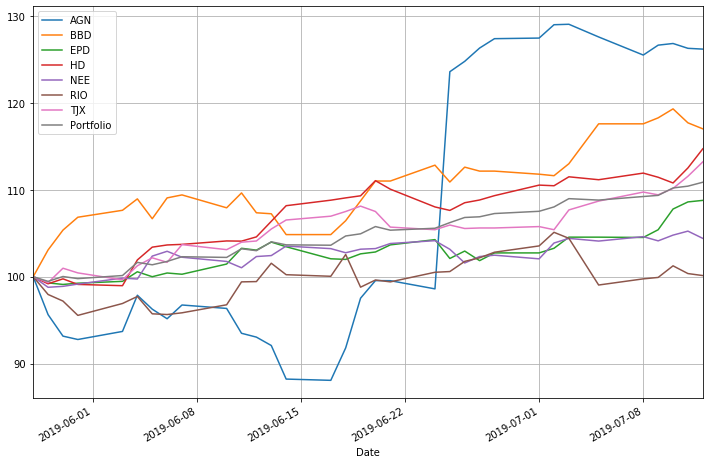

In [10]:
quote.setup_mask(['AGN', 'BBD', 'EPD', 'HD', 'NEE', 'RIO', 'TJX'])
ratio, mean, *_ = quote.find_optimal_ratio()
print(ratio, mean)
quote.graph(ratio)

evicted VZ 0.605 -0.425
evicted PHG 0.673 -0.322
evicted ET 0.641 -0.436
evicted KDP 0.649 -0.448
evicted ORCL 0.689 -0.363
evicted VALE 0.619 -0.468
evicted RBS 0.694 -0.441
evicted CTSH 0.676 -0.325
evicted EQNR 0.682 -0.276
evicted SMFG 0.676 -0.351
evicted AMX 0.577 -0.458
evicted MUFG 0.650 -0.411
evicted TD 0.609 -0.224
evicted DEO 0.517 -0.348
evicted PSX 0.427 -0.317
evicted DE 0.598 -0.428
evicted ILMN 0.357 -0.356
evicted SLB 0.504 -0.470
evicted MU 0.405 -0.443
evicted UNH 0.523 -0.417
retry backlogs ['DD', 'TMUS', 'MNST', 'EC', 'FDX', 'GILD', 'HUM', 'RTN', 'T', 'SNY', 'UTX', 'PFE', 'HMC', 'AMGN', 'AAPL', 'MAR', 'KHC', 'SPGI', 'GD', 'BLK', 'ADSK', 'LYG', 'VOD', 'CMCSA', 'ATVI', 'ORAN', 'AFL', 'MRK', 'CVX', 'SYY', 'DOW', 'EBAY', 'ADI', 'GE', 'AVGO', 'BKNG', 'EMR', 'ISRG', 'BAX', 'GM', 'TAK', 'ADP', 'NOC', 'CME', 'AON', 'ALL', 'FMX', 'PEP', 'ITW', 'UPS', 'STZ', 'MA', 'SQ', 'CNQ', 'AMZN', 'PBR-A', 'CHTR', 'MDLZ', 'BMY', 'BX', 'TM', 'WBA', 'MELI', 'PLD', 'LIN', 'EXC', 'V', 'BABA

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,28.0,1.742610,0.301052,1.063631,1.586811,1.764694,1.887264,2.527525,5.656585,10.878778,0.536457
HD,28.0,2.218893,2.059790,-2.002365,0.890482,2.350689,4.262738,5.206084,1.057977,14.727601,3.081654
TJX,28.0,1.858135,2.084464,-2.382713,0.232163,2.708714,3.515239,4.509286,0.872384,13.221488,2.512007
EPD,28.0,1.336065,1.721132,-1.467571,0.180967,1.239384,2.663938,4.376294,0.753215,8.790033,2.320814
BBD,28.0,2.234515,3.305886,-4.175362,0.328166,1.840675,4.351848,8.961896,0.663916,17.029656,4.374995
NEE,28.0,0.944327,1.482610,-2.007681,0.201593,0.851317,1.786313,4.082145,0.610170,4.414077,2.463972
AGN,28.0,5.850436,12.264718,-8.817745,-1.881890,1.580169,9.076500,34.640247,0.473778,26.208052,11.932121
RIO,28.0,0.543394,2.955398,-3.885647,-2.003624,0.386154,3.056791,6.173475,0.170438,0.131945,5.774361


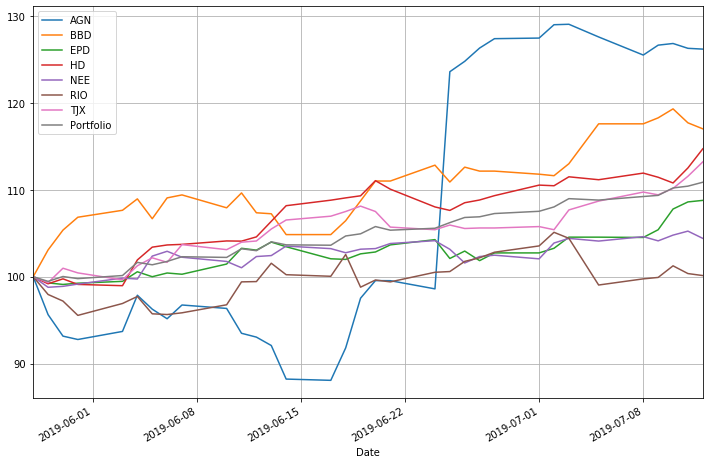

In [11]:
bounds = 1.5, 2.1
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(min_percent=.05, max_count=8, backlogs_pos_threshold=.7, bounds=bounds)
quote.setup_mask(['AGN', 'BBD', 'EPD', 'HD', 'NEE', 'RIO', 'TJX'])
sd.update(quote.optimize_portfolio(min_percent=.05, max_count=8, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(min_percent=.05, max_count=8, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)